<h1>App Physics 155 - LE 3</h1>
<h2>Kenneth V. Domingo<br />
2015-03116</h2>

<b>Problem 3.5: The Schrodinger equation and the spectral method</b>

This problem uses the spectral method to solve the time-dependent Schrodinger equation

\begin{equation}
    -\frac{\hbar^2}{2M}\frac{\partial^2 \psi}{\partial x^2} = i\hbar\frac{\partial\psi}{\partial t}
\end{equation}

for the same system as in Problem 3.4, a single particle in one dimension in a box of length $L$ with impenetrable walls. The wavefunction in such a box necessarily goes to zero on the walls and hence one possible (unnormalized) solution of the equation is

\begin{equation}
    \psi_k (x,t) = \sin{\Big(\frac{\pi kx}{L}\Big)}e^{iEt/\hbar}
\end{equation}

where the energy $E$ can be found by substituting into the Schrodinger equation, giving

\begin{equation}
    E = \frac{\pi^2 \hbar^2 k^2}{2ML^2}
\end{equation}

We can write a full solution as a linear combination of such individual solutions, which on the grid points $x_n = \frac{nL}{N}$ takes the value

\begin{equation}
    \psi(x_n,t) = \frac{1}{N}\sum_{k=1}^{N-1} b_k \sin{\Big(\frac{\pi kn}{N}\Big)} e^{i\frac{\pi^2 \hbar k^2}{2ML^2}t}
\end{equation}

where the $b_k$ are some set of (possibly complex) coefficients that specify the exact shape of the wavefunction and the leading factor of $\frac{1}{N}$ is optional but convenient.

Since the Schrodinger equation (unlike the wave equation) is first order in time, we need only a single initial condition on the value of $\psi(x, t)$ to specify the coefficients $b_k$, although, since the coefficients are in general complex, we will need to calculate both real and imaginary parts of each coefficient.

As in Problem3.4 we consider an electron (mass $M$ = 9.109$\times$10$^{−31}$ kg) in a box of length $L$ = 10$^{−8}$m. At time $t$ = 0 the wavefunction of the electron has the form

\begin{equation}
    \psi(x,0) = e^{-\frac{(x-x_0)^2}{2\sigma^2}}e^{-i\kappa x}
\end{equation}

where $x_0$ = $\frac{L}{2}$, $\sigma$ = 1$\times$10$^{-10}$ m, $\kappa$ = 5$\times$10$^{10}$ m$^{-1}$, and $\psi$ = 0 on the walls at $x$ = 0 and $x$ = $L$.

a) Write a program to calculate the values of the coefficients $b_k$, which for convenience can be broken down into their real and imaginary parts as $b_k = \alpha_k + i\eta_k$. Divide the box into $N$ = 1000 slices and create two arrays containing the real and imaginary parts of $\psi(x_n, 0)$ at each grid point. Perform discrete sine transforms on each array separately and hence calculate the values of the $\alpha_k$ and $\eta_k$ for all $k = 1 . . . N − 1$.

To perform the discrete sine transforms, you can use the fast transform function dst from the package dcst, which you can find in the on-line resources in the file named dcst.py. A copy of the code for the package can also be found in Appendix E. The function takes an array of $N$ real numbers and returns the discrete sine transform as another array of $N$ numbers.

(Note that the first element of the input array should in principle always be zero for a sine transform, but if it is not the dst function will simply pretend that it is. Similarly the first element of the returned array is always zero, since the $k$ = 0 coefficient of a sine transform is always zero. So in effect, the sine transform really only takes $N − 1$ real numbers and transforms them into another $N − 1$ real numbers. In some implementations of the discrete sine transform, therefore, though not the one in the package dsct used here, the first element of each array is simply omitted, since it’s always zero anyway, and the arrays are only $N − 1$ elements long.)

b) Putting $b_k = \alpha_k + i\eta_k$ in the solution above and taking the real part we get

\begin{equation}
    \Re\psi(x_n,t) = \frac{1}{N}\sum_{k=1}^{N-1}\Big[ \alpha_k \cos{\Big( \frac{\pi^2 \hbar k^2}{2ML^2}t\Big)} - \eta_k \sin{\Big(\frac{\pi^2 \hbar k^2}{2ML^2}t\Big)} \Big] \sin{\frac{\pi kn}{N}}
\end{equation}

for the real part of the wavefunction. This is an inverse sine transform with coefficients equal to the quantities in the square brackets. Extend your program to calculate the real part of the wavefunction $\psi(x, t)$ at an arbitrary time $t$ using this formula and the inverse discrete sine transform function idst, also from the package dcst. Test your program by making a graph of the wavefunction at time $t$ = 10$^{−16}$ s.

In [1]:
import numpy as np
import matplotlib.pyplot as mp
%matplotlib inline
import scipy.constants as sp
import dcst

In [2]:
L = 1e-8
M = sp.electron_mass
N = 1000
a = L/N

psi = np.zeros([N+1], complex)
def psi0(x):
    x0 = L/2
    sigma = 1e-10
    kappa = 5e10
    return np.exp(-(x-x0)**2/2/sigma**2)*np.exp(1j*kappa*x)

In [3]:
x = np.linspace(0,L,N+1)
psi[:] = psi0(x)
psi[[0,N]] = 0

In [4]:
b0 = dcst.dst(psi)
t = 1e-18
k = np.arange(1,N+2)
b = b0*np.exp(1j*np.pi**2*sp.hbar*k**2/2/M/L**2*t)
psix = dcst.idst(b)

C:\Users\User\Google Drive\3-2\App Physics 155\LE3\dcst.py:99: ComplexWarning: Casting complex values to real discards the imaginary part
  y2[1:N] = y[1:]
C:\Users\User\Google Drive\3-2\App Physics 155\LE3\dcst.py:100: ComplexWarning: Casting complex values to real discards the imaginary part
  y2[:N:-1] = -y[1:]


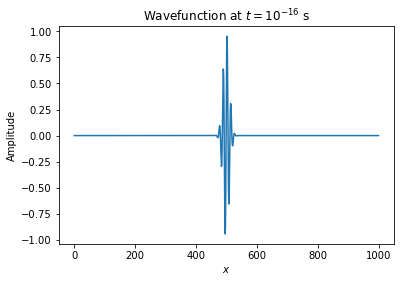

In [5]:
mp.plot(psix)
mp.title("Wavefunction at $t = 10^{-16}$ s")
mp.xlabel("$x$")
mp.ylabel("Amplitude")
mp.show()